<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-of-equilibrium-in-short-and-long-run" data-toc-modified-id="Example-of-equilibrium-in-short-and-long-run-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example of equilibrium in short and long-run</a></span></li><li><span><a href="#Another-example-of-equilibrium-in-short-and-long-run" data-toc-modified-id="Another-example-of-equilibrium-in-short-and-long-run-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Another example of equilibrium in short and long-run</a></span></li></ul></div>

In [1]:
# setup
%matplotlib inline
%load_ext autoreload
%autoreload 1

import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import seaborn as sns
sns.set_style("whitegrid")
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

import ipywidgets as widgets

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:5000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

# Example of equilibrium in short and long-run

The $N$ consumers each demands

$$ x_{i}^{d}(p)=x^{d}(p)=\left(\frac{\alpha}{2p}\right)^{2} $$

In the short-run, the $J$ firms eachs supplies

$$ x_{j}^{s}(p)=x^{s}(p) = \left[\frac{ap}{w}\left(A\overline{k}^{a}\right)^{\frac{1}{a}}\right]^{\frac{a}{1-a}} $$

The long-run average cost function is

$$ AC(x,w,r)=\eta x^{\frac{1}{4}}+\frac{FC}{x} \,\,\text{where}\,\, \eta=\frac{2(wr)^{\frac{1}{2}}}{20^{5/4}}$$

with the minimum

$$ \underline{x}=\left(4\frac{FC}{\eta}\right)^{\frac{4}{5}} $$

In [3]:
alpha = 50
N = 64*10**3
A = 20 
a = 2/5
w = 20
r = 10
kbar = 256
J = 1250
FC = 1280

In [4]:
# code

# a. functions
def demand_func(p,alpha):
    return (alpha/(2*p))**2

def market_demand_func(p,N,alpha):
    return N*demand_func(p,alpha)

def supply_func(p,w,kbar,A,a):
    return (a*p/w*(A*kbar**a)**(1/a))**(a/(1-a))

def market_supply_func(p,w,J,kbar,A,a):
    return J*supply_func(p,w,kbar,A,a)

def AC_func(x,w,r,FC,a,A):
    eta = 2*(w*r)**(0.5)/(A**(1/(2*a)))
    return eta*x**(1/(2*a)-1) + FC/x
    
def x_min_AC_func(w,r,a,A):
    return A*(4*FC**2/(w*r))**a

# b. short-run
p = 5

demand = demand_func(p,alpha)
market_demand = market_demand_func(p,N,alpha)

supply = supply_func(p,w,kbar,A,a)
market_supply = market_supply_func(p,w,J,kbar,A,a)

print(f'with p_SR = 5 we get')
print(f'demand = {demand:12.4f} -> market demand = {market_demand:12.4f}')
print(f'supply = {supply:12.4f} -> market supply = {market_supply:12.4f}')
print('')

# c. long-run
x_min = x_min_AC_func(w,r,a,A)
p_LR = AC_func(x_min,w,r,FC,a,A)

demand = demand_func(p_LR,alpha)
market_demand = market_demand_func(p_LR,N,alpha)

J_LR = market_demand/x_min

print(f'p_LR = AC(xmin) = {p_LR:.4f}')
print(f'demand = {demand:12.4f} -> market demand = {market_demand:12.4f}')
print(f'x_min  = {x_min:12.4f} -> J_LR = {J_LR:.1f}')

with p_SR = 5 we get
demand =      25.0000 -> market demand = 1600000.0000
supply =    1280.0000 -> market supply = 1600000.0000

p_LR = AC(xmin) = 5.0000
demand =      25.0000 -> market demand = 1600000.0000
x_min  =    1280.0000 -> J_LR = 1250.0


# Another example of equilibrium in short and long-run

Consider an economy where all firms have the cost function

$$ C(x)=0.01\cdot x^{3}-40\cdot x^{2}+45.000\cdot x $$

There is free entry & exit and market demand is

$$ D^{M}(p)=\begin{cases}
100000-10p & \text{hvis }p\leq10000\\
0 & \text{hvis }p\leq10000
\end{cases} $$

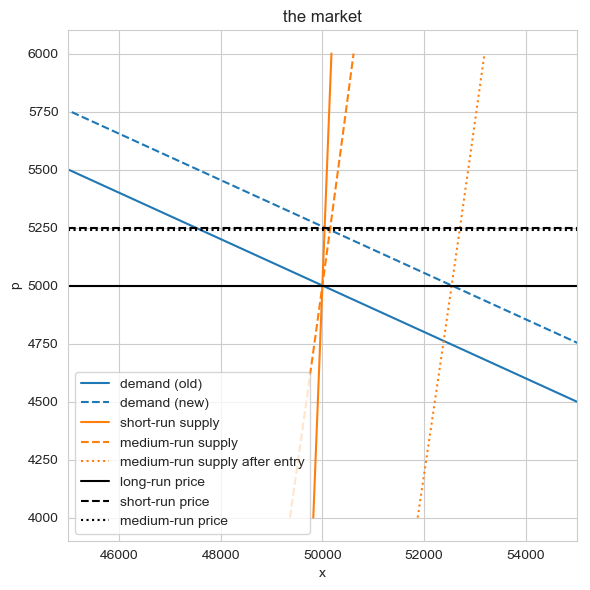

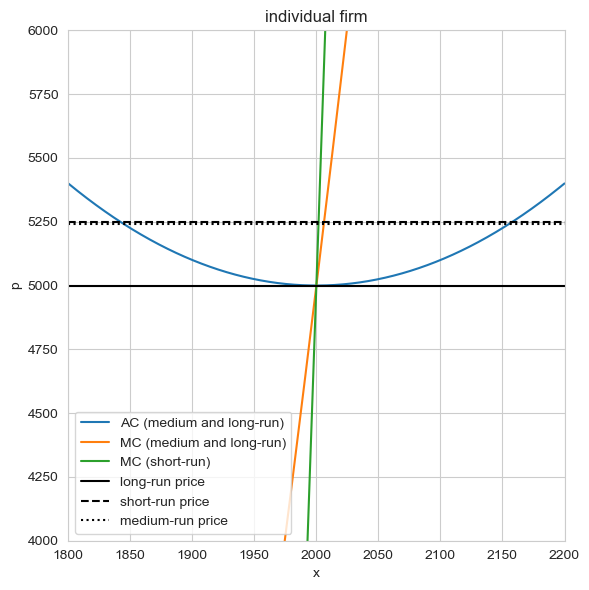

In [5]:
# code
# a. settings
p_min = 4000
p_max = 6000

x_min = 1800*25
x_max = 2200*25

p_LR = 5000 # analytical
J_LR = 25 # analytical
p_SR = 5250 # choice
fac = 50 # choice

# b. grids
p_vec = np.linspace(p_min,p_max,1000)
x_vec = np.linspace(x_min,x_max,1000)

# c.  cost functions
def AC(x):
    return 0.01*x**2-40*x+45000

def MC(x):
    return 0.03*x**2-80*x+45000

def AC_SR(x):
    return 0.03*x**2-80*x+45000+fac*(x-2000)**2/x

def MC_SR(x):
    return 0.03*x**2-80*x+45000+2*fac*(x-2000)

# d. market functions
def market_demand(p):
    return np.fmax(100000-10*p,0)

def market_supply(J,p):
    return J*10/3*(np.sqrt(3*p+25000)+400)

def market_supply_SR(J,p):
    return J*10/3*(np.sqrt(100*fac**2+4000*fac+3*p+25000)-10*fac+400)

# e. determine stuff
def target_add(add,J,p_SR):
    return (market_demand(p_SR)+add)-market_supply_SR(J,p_SR)

def target_p_MR(p_MR,add,J):
    return (market_demand(p_MR)+add)-market_supply(J,p_MR)

def target_J_new(J_new,add,p_LR):
    return (market_demand(p_LR)+add)-market_supply_SR(J_new,p_LR)

add = optimize.newton(target_add, 0.0,args=(J_LR,p_SR))
p_MR = optimize.newton(target_p_MR,p_LR,args=(add,J_LR))
J_new = optimize.newton(target_J_new, J_LR,args=(add,p_LR))

# f. market figure
fig = plt.figure(frameon=False,figsize=(6,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.set_title('the market')

DM = market_demand(p_vec)
ax.plot(DM,p_vec,color=colors[0],label='demand (old)')
ax.plot(DM+add,p_vec,color=colors[0],ls='--',label='demand (new)')

SM_SR = market_supply_SR(J_LR,p_vec)
ax.plot(SM_SR,p_vec,color=colors[1],ls='-',label='short-run supply')

SM = market_supply(J_LR,p_vec)
ax.plot(SM,p_vec,color=colors[1],ls='--',label='medium-run supply')

SM_new = market_supply(J_new,p_vec)
ax.plot(SM_new,p_vec,ls=':',color=colors[1],label='medium-run supply after entry')

ax.plot([x_min,x_max],[p_LR,p_LR],color='black',label='long-run price')
ax.plot([x_min,x_max],[p_SR,p_SR],color='black',ls='--',label='short-run price')
ax.plot([x_min,x_max],[p_MR,p_MR],color='black',ls=':',label='medium-run price')

ax.set_xlim([x_min,x_max])
ax.set_xlabel('x')
ax.set_ylabel('p')
        
fig.tight_layout()
legend = ax.legend(loc='lower left',frameon=True)
        
# g. individual firm
fig = plt.figure(frameon=False,figsize=(6,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.set_title('individual firm')

ax.plot(x_vec/J_LR,AC(x_vec/J_LR),label='AC (medium and long-run)')
ax.plot(x_vec/J_LR,MC(x_vec/J_LR),label='MC (medium and long-run)')

ax.plot(x_vec/J_LR,MC_SR(x_vec/J_LR),label='MC (short-run)')

ax.plot([x_min/J_LR,x_max/J_LR],[p_LR,p_LR],color='black',label='long-run price')
ax.plot([x_min/J_LR,x_max/J_LR],[p_SR,p_SR],color='black',ls='--',label='short-run price')
ax.plot([x_min/J_LR,x_max/J_LR],[p_MR,p_MR],color='black',ls=':',label='medium-run price')

ax.set_xlim([x_min/J_LR,x_max/J_LR])
ax.set_ylim([p_min,p_max])
ax.set_xlabel('x')
ax.set_ylabel('p')
        
fig.tight_layout()
legend = ax.legend(loc='lower left',frameon=True)